In [35]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
import sys
from matplotlib import pyplot as plt
%matplotlib inline

In [36]:
data = pd.read_csv('google_activity_by_London_Borough.csv')
data.head()

,date,area_name,area_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,City of London,E09000001,-5.0,-9.0,-12.0,-11,NaN,NaN
1,2020-02-16,City of London,E09000001,-1.0,-21.0,-23.0,-13,NaN,NaN
2,2020-02-17,City of London,E09000001,-3.0,-2.0,4.0,-1,-4.0,NaN
3,2020-02-18,City of London,E09000001,-2.0,-2.0,-1.0,-2,-2.0,NaN
4,2020-02-19,City of London,E09000001,-7.0,-4.0,5.0,0,-4.0,NaN


In [37]:
data[data.isnull().sum(axis=1) > 3]

,date,area_name,area_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
189,2020-08-22,City of London,E09000001,-69.0,NaN,NaN,-53,NaN,NaN
190,2020-08-23,City of London,E09000001,-68.0,NaN,NaN,-54,NaN,NaN
196,2020-08-29,City of London,E09000001,-66.0,NaN,NaN,-51,NaN,NaN
197,2020-08-30,City of London,E09000001,-60.0,NaN,NaN,-51,NaN,NaN
203,2020-09-05,City of London,E09000001,-62.0,NaN,NaN,-54,NaN,NaN
204,2020-09-06,City of London,E09000001,-60.0,NaN,NaN,-54,NaN,NaN
12373,2020-08-23,Kensington and Chelsea,E09000020,-58.0,NaN,NaN,-59,NaN,NaN
12380,2020-08-30,Kensington and Chelsea,E09000020,-54.0,NaN,NaN,-53,NaN,NaN
12387,2020-09-06,Kensington and Chelsea,E09000020,-52.0,NaN,NaN,-58,NaN,NaN


In [38]:
sum(data.isnull().sum(axis=1) > 3)

9

In [39]:
data.drop([189, 190, 196, 197, 203, 204, 12373, 12380, 12387])

,date,area_name,area_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,City of London,E09000001,-5.0,-9.0,-12.0,-11,NaN,NaN
1,2020-02-16,City of London,E09000001,-1.0,-21.0,-23.0,-13,NaN,NaN
2,2020-02-17,City of London,E09000001,-3.0,-2.0,4.0,-1,-4.0,NaN
3,2020-02-18,City of London,E09000001,-2.0,-2.0,-1.0,-2,-2.0,NaN
4,2020-02-19,City of London,E09000001,-7.0,-4.0,5.0,0,-4.0,NaN
...,...,...,...,...,...,...,...,...,...
12964,2021-03-09,Kingston upon Thames,E09000021,-59.0,-15.0,NaN,-55,-57.0,21.0
12965,2021-03-10,Kingston upon Thames,E09000021,-67.0,-22.0,18.0,-60,-56.0,23.0
12966,2021-03-11,Kingston upon Thames,E09000021,-65.0,-15.0,NaN,-57,-56.0,23.0
12967,2021-03-12,Kingston upon Thames,E09000021,-63.0,-6.0,NaN,-54,-53.0,22.0


In [40]:
data.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,12951.000000,12957.000000,12103.000000,12969.000000,12806.000000,12470.000000
mean,-48.391784,-17.563556,28.377262,-53.359318,-47.865766,17.713152
std,25.495806,17.410613,58.343927,20.076837,22.023392,9.362128
min,-99.000000,-97.000000,-96.000000,-99.000000,-91.000000,-1.000000
25%,-68.000000,-25.000000,-8.000000,-67.000000,-64.000000,12.000000
50%,-51.000000,-15.000000,18.000000,-56.000000,-53.000000,18.000000
75%,-28.000000,-8.000000,56.000000,-43.000000,-35.000000,25.000000
max,90.000000,54.000000,457.000000,71.000000,7.000000,42.000000


In [41]:
data.columns

Index(['date', 'area_name', 'area_code',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [42]:
data.shape

(12969, 9)

In [43]:
data.isnull().sum()

date                                                    0
area_name                                               0
area_code                                               0
retail_and_recreation_percent_change_from_baseline     18
grocery_and_pharmacy_percent_change_from_baseline      12
parks_percent_change_from_baseline                    866
transit_stations_percent_change_from_baseline           0
workplaces_percent_change_from_baseline               163
residential_percent_change_from_baseline              499
dtype: int64

In [49]:
data['residential_percent_change_from_baseline'].median()

18.0

In [50]:
data['retail_and_recreation_percent_change_from_baseline'].median()

-51.0

In [51]:
data['grocery_and_pharmacy_percent_change_from_baseline'].median()

-15.0

In [52]:
data['parks_percent_change_from_baseline'].median()

18.0

In [53]:
data['workplaces_percent_change_from_baseline'].median()

-53.0

In [54]:
data[data['retail_and_recreation_percent_change_from_baseline'].isnull()] = -51.0
data[data['grocery_and_pharmacy_percent_change_from_baseline'].isnull()] = -15.0
data[data['parks_percent_change_from_baseline'].isnull()] = 18.0
data[data['workplaces_percent_change_from_baseline'].isnull()] = -53.0
data[data['residential_percent_change_from_baseline'].isnull()] = 18.0

In [55]:
data.isnull().sum()

date                                                  0
area_name                                             0
area_code                                             0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64

In [56]:
data.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000,12969.000000
mean,-42.289151,-13.238877,29.759195,-46.286144,-41.173336,17.081579
std,30.168046,18.106742,54.033113,27.998233,28.302718,11.825281
min,-96.000000,-93.000000,-86.000000,-97.000000,-91.000000,-53.000000
25%,-66.000000,-23.000000,-3.000000,-66.000000,-62.000000,12.000000
50%,-48.000000,-13.000000,18.000000,-53.000000,-50.000000,18.000000
75%,-23.000000,-4.000000,52.000000,-38.000000,-22.000000,24.000000
max,90.000000,54.000000,457.000000,71.000000,18.000000,42.000000


In [57]:
# data cleaning part
data.to_csv('London_retail_recreation_cleaned.csv', index=False)

In [58]:
data.head()

,date,area_name,area_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,-53,-53,-53,-53.0,-53.0,-53.0,-53,-53.0,-53.0
1,-53,-53,-53,-53.0,-53.0,-53.0,-53,-53.0,-53.0
2,18,18,18,18.0,18.0,18.0,18,18.0,18.0
3,18,18,18,18.0,18.0,18.0,18,18.0,18.0
4,18,18,18,18.0,18.0,18.0,18,18.0,18.0


In [62]:
data['area_code'].unique()

array([-53.0, 18.0, -15.0, 'E09000033', 'E09000002', 'E09000003',
       'E09000004', 'E09000005', 'E09000006', 'E09000007', 'E09000008',
       'E09000009', 'E09000010', 'E09000012', 'E09000013', 'E09000014',
       'E09000015', -51.0, 'E09000016', 'E09000017', 'E09000018',
       'E09000019', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
       'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
       'E09000031', 'E09000032', 'E09000011', 'E09000020', 'E09000021'],
      dtype=object)

In [63]:
area_list = [-53.0, -51.0, -15.0, 18.0, ]

In [64]:
data[data['area_code'].isin(area_list)]

,date,area_name,area_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,-53,-53,-53,-53.0,-53.0,-53.0,-53,-53.0,-53.0
1,-53,-53,-53,-53.0,-53.0,-53.0,-53,-53.0,-53.0
2,18,18,18,18.0,18.0,18.0,18,18.0,18.0
3,18,18,18,18.0,18.0,18.0,18,18.0,18.0
4,18,18,18,18.0,18.0,18.0,18,18.0,18.0
...,...,...,...,...,...,...,...,...,...
12960,18,18,18,18.0,18.0,18.0,18,18.0,18.0
12963,18,18,18,18.0,18.0,18.0,18,18.0,18.0
12964,18,18,18,18.0,18.0,18.0,18,18.0,18.0
12966,18,18,18,18.0,18.0,18.0,18,18.0,18.0


In [71]:
data_retail = data[['date','retail_and_recreation_percent_change_from_baseline']]

In [82]:
data_retail['date'].unique()

array(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-

In [97]:
data_area = data.groupby(['date']).agg({'retail_and_recreation_percent_change_from_baseline':'mean',
                                        'grocery_and_pharmacy_percent_change_from_baseline':'mean',
                                        'parks_percent_change_from_baseline':'mean',
                                        'transit_stations_percent_change_from_baseline':'mean',
                                        'workplaces_percent_change_from_baseline':'mean',
                                        'residential_percent_change_from_baseline':'mean'})

In [98]:
data_area

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,
2020-02-15,-9.757576,-6.818182,-32.606061,-7.909091,-2.468750,2.187500
2020-02-16,-10.575758,-10.878788,-45.030303,-9.545455,-3.937500,1.580645
2020-02-17,10.000000,3.363636,17.156250,-3.575758,-12.606061,2.281250
2020-02-18,6.696970,-1.727273,7.515152,-5.454545,-12.212121,2.500000
2020-02-19,5.424242,-2.484848,-5.606061,-6.666667,-12.424242,2.687500
...,...,...,...,...,...,...
2021-03-09,-51.818182,-9.515152,78.093750,-56.969697,-56.181818,20.062500
2021-03-10,-59.696970,-18.212121,-16.848485,-60.363636,-55.818182,22.593750
2021-03-11,-56.424242,-8.939394,15.843750,-58.545455,-55.454545,21.656250


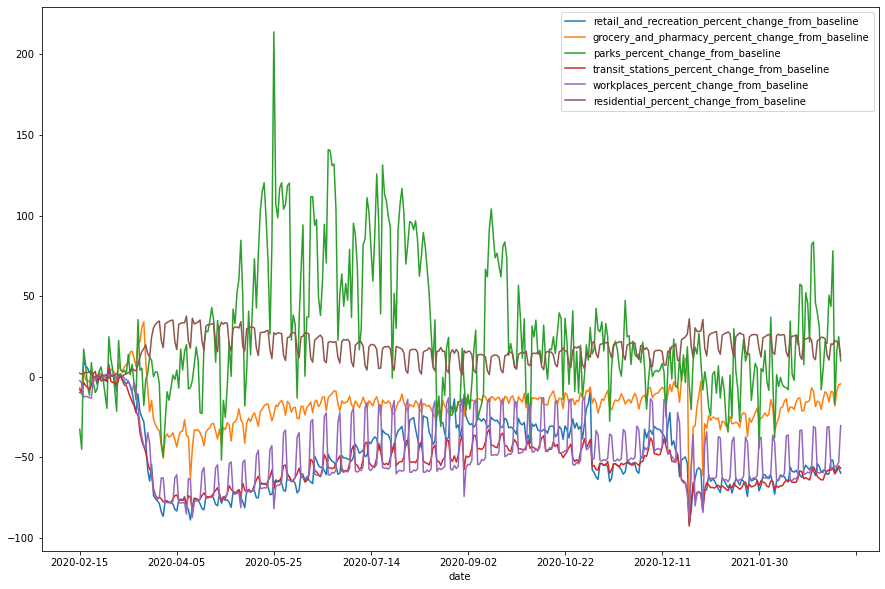

In [104]:
# plot the percent change from baseline of 6 aspecks 
data_area['retail_and_recreation_percent_change_from_baseline'].plot(figsize=(15,10))
data_area['grocery_and_pharmacy_percent_change_from_baseline'].plot(figsize=(15,10))
data_area['parks_percent_change_from_baseline'].plot(figsize=(15,10))
data_area['transit_stations_percent_change_from_baseline'].plot(figsize=(15,10))
data_area['workplaces_percent_change_from_baseline'].plot(figsize=(15,10))
data_area['residential_percent_change_from_baseline'].plot(figsize=(15,10))
plt.legend()

/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

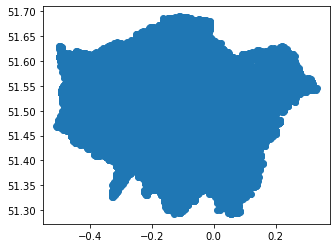

In [15]:
ldn = gpd.read_file('./POIs/POIs_London.shp')
ldn = ldn.to_crs({'init': 'epsg:4326'})
ldn.plot()

<AxesSubplot:>

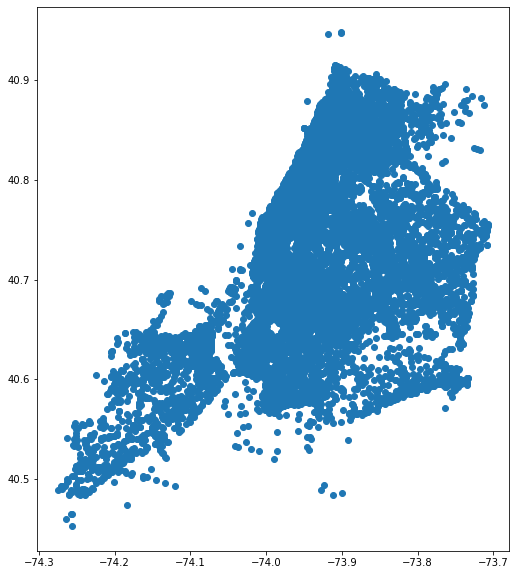

In [19]:
NYC_poi = gpd.read_file('Points Of Interest.geojson')
NYC_poi.plot(figsize=(10,10))

In [26]:
NYC_poi.head()

,name,source,complexid,saftype,pri_add,modified,faci_dom,facility_t,b7_sc,placeid,bin,sos,segmentid,borough,created,geometry
0,HRD RAMP TO GWB OVER HRD SB,DCP,401,N,0,2020-03-12T00:00:00,8,6,11095502,1031153,0,1,193927,1,2018-04-12T00:00:00,POINT (-73.93149 40.84419)
1,GOETHALS,DCP,0,N,0,2020-03-16T00:00:00,8,6,59703501,19954,0,1,321726,5,2008-03-15T00:00:00,POINT (-74.19673 40.63526)
2,KOCH BR PEDESTRIAN AND BIKE PATH,DoITT,0,N,0,2020-03-16T00:00:00,8,6,19792015,1026908,0,1,138896,1,2015-10-20T00:00:00,POINT (-73.95802 40.75849)
3,KOCH BR PEDESTRIAN AND BIKE,DoITT,0,N,0,2020-03-16T00:00:00,8,6,49734017,1026909,0,1,139388,4,2015-10-20T00:00:00,POINT (-73.95062 40.75530)
4,14 AV OV BELT CROSS ISL PKWY,DCP,0,N,0,2018-04-19T00:00:00,8,6,40074101,1031297,0,2,179357,4,2018-04-13T00:00:00,POINT (-73.81678 40.78815)


In [20]:
NYC = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')
NYC.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


<AxesSubplot:>

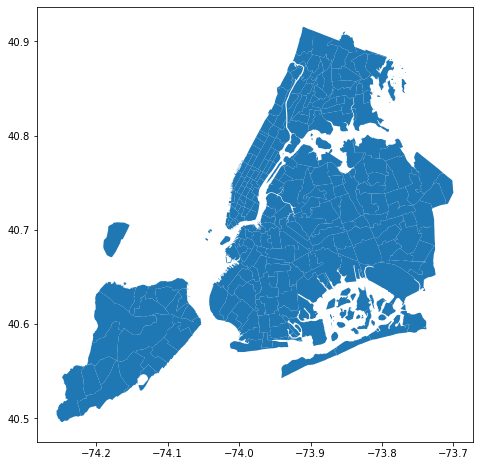

In [24]:
NYC.plot(figsize=(8,8))

In [8]:
# NYC data
# https://data.world/new-york-city/subway-entrances
df = pd.read_csv('https://query.data.world/s/ltuqlo44l3fcyk53pi7ru2equddjqt')

In [9]:
df.head()

,OBJECTID,URL,NAME,the_geom,LINE
0,1734,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NW corner,POINT (-73.86835600032798 40.84916900104506),2-5
1,1735,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NE corner,POINT (-73.86821300022677 40.84912800131844),2-5
2,1736,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.87349900050798 40.84122300105249),2-5
3,1737,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.8728919997833 40.84145300067447),2-5
4,1738,http://web.mta.info/nyct/service/,Boston Rd & 178th St at SW corner,POINT (-73.87962300013866 40.84081500075867),2-5


In [11]:
parks = pd.read_csv('Parks_Trails.csv')
parks.head()

,Park_Name,Width_ft,Class,Surface,Gen_Topog,Difficulty,Date_Collected,Trail_Name,ParkID,TrailMarkersInstalled,SHAPE
0,Alley Pond Park,3,ClassIII developed/improved,Dirt,Level,1.0,12/18/2013 10:24:07 AM,Blue Trail,Q001,Yes,MULTILINESTRING ((-77.51985362610884 40.112488...
1,Alley Pond Park,4,ClassIII developed/improved,Dirt,Level,1.0,04/04/2014 02:17:27 PM,Blue Trail,Q001,Yes,MULTILINESTRING ((-77.51985362932932 40.112488...
2,Alley Pond Park,8,ClassIV highly developed,Dirt,Level,1.0,12/19/2013 09:39:24 AM,NaN,Q001,No,MULTILINESTRING ((-77.51985364221491 40.112488...
3,Alley Pond Park,5,ClassIII developed/improved,Dirt,Level,1.0,12/18/2013 10:24:07 AM,Blue Trail,Q001,Yes,MULTILINESTRING ((-77.5198536284903 40.1124889...
4,Alley Pond Park,8,ClassIV highly developed,Paved,Level,1.0,12/19/2013 09:39:24 AM,NaN,Q001,No,MULTILINESTRING ((-77.51985364221491 40.112488...


/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

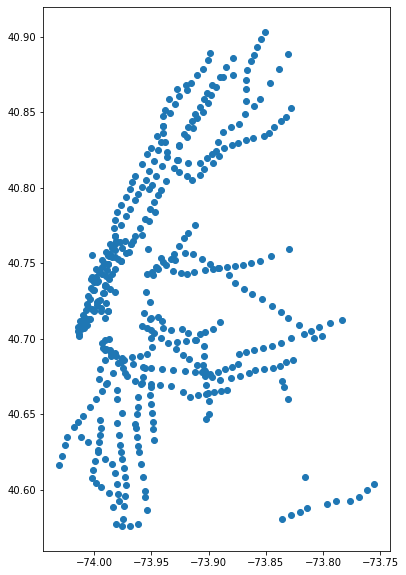

In [29]:

NYCsubway = gpd.read_file('Subway Stations.geojson')
#NYCsubway = NYCsubway.to_crs({'init': 'epsg:4326'})
NYCsubway.plot(figsize=(10,10))

<AxesSubplot:>

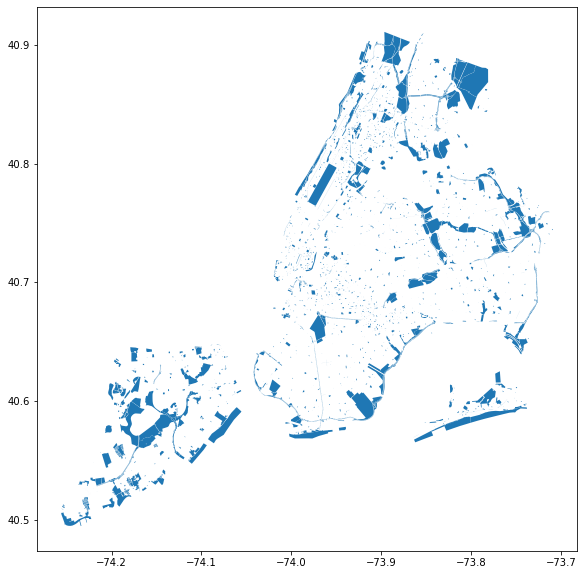

In [46]:
NYC_school = gpd.read_file('ARCHIVED - Parks Properties.geojson')
#ldn = ldn.to_crs({'init': 'epsg:4326'})
NYC_school.plot(figsize=(10,10))

/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:568: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,
/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:568: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


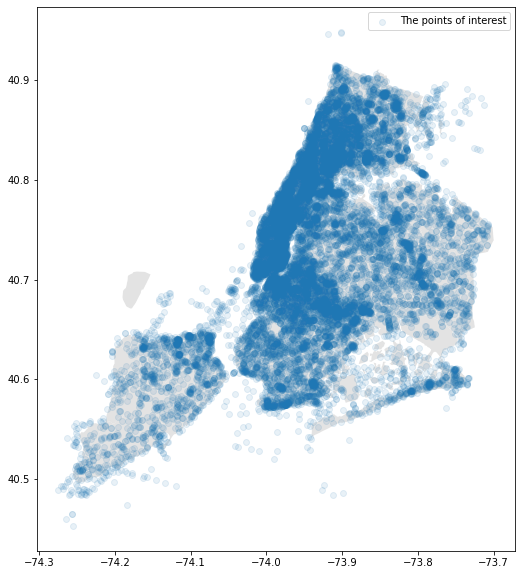

In [110]:
fig,ax = plt.subplots(figsize=(10,10))
NYC.plot(axes=ax,alpha=0.8,color='gainsboro', figsize=(5,5))
NYC_poi.plot(axes=ax, alpha=0.1, figsize=(5,5),label='The points of interest')
plt.legend()

/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:568: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,
/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:568: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,
/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:568: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


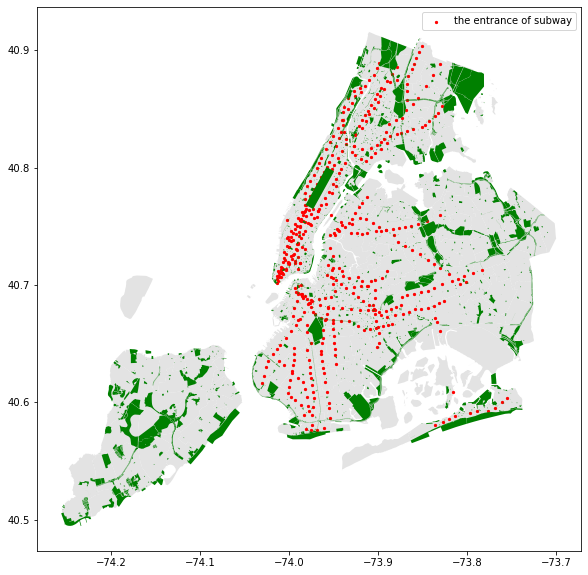

In [109]:
fig,ax = plt.subplots(figsize=(10,10))
NYC.plot(axes=ax,alpha=0.8,color='gainsboro')
NYCsubway.plot(axes=ax,marker=".", markersize=20, color='red',label='the entrance of subway')
NYC_school.plot(axes=ax, color='green',label='park')
plt.legend()